In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
RAW_df_training_vals = pd.read_csv('../data/_raw/Training set values - 4910797b-ee55-40a7-8668-10efd5c1b960.csv', index_col = 'id')

In [3]:
RAW_df_training_labels = pd.read_csv('../data/_raw/Training set labels - 0bf8bc6e-30d0-4c50-956a-603fc693d966.csv', index_col = 'id')

In [4]:
RAW_df_training_vals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   date_recorded          59400 non-null  object 
 2   funder                 55765 non-null  object 
 3   gps_height             59400 non-null  int64  
 4   installer              55745 non-null  object 
 5   longitude              59400 non-null  float64
 6   latitude               59400 non-null  float64
 7   wpt_name               59400 non-null  object 
 8   num_private            59400 non-null  int64  
 9   basin                  59400 non-null  object 
 10  subvillage             59029 non-null  object 
 11  region                 59400 non-null  object 
 12  region_code            59400 non-null  int64  
 13  district_code          59400 non-null  int64  
 14  lga                    59400 non-null  object 
 15

In [5]:
len(RAW_df_training_vals)

59400

In [6]:
# quickly see which columns has NaNs
nan_cols = [i + ' ' + str(len(i)) for i in RAW_df_training_vals.columns if RAW_df_training_vals[i].isnull().any()]
nan_cols

['funder 6',
 'installer 9',
 'subvillage 10',
 'public_meeting 14',
 'scheme_management 17',
 'scheme_name 11',
 'permit 6']

# helper functions -- start with stubb

In [7]:
def get_status_group_action(val):
    if val == 'functional':
        return 'no action'
    elif val == 'non functional' or val == 'functional needs repair':
        return 'action'    
    else:
        return '_check'

In [8]:
# a function that can take the string values and make them categorical (?) index number? label encoding?

In [9]:
# date record?
RAW_df_training_vals['date_recorded']

id
69572    2011-03-14
8776     2013-03-06
34310    2013-02-25
67743    2013-01-28
19728    2011-07-13
            ...    
60739    2013-05-03
27263    2011-05-07
37057    2011-04-11
31282    2011-03-08
26348    2011-03-23
Name: date_recorded, Length: 59400, dtype: object

In [10]:
df = RAW_df_training_vals.copy()

In [11]:
df

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,per bucket,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,annually,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,monthly,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump


In [12]:
RAW_df_training_labels

,status_group
id,
69572,functional
8776,functional
34310,functional
67743,non functional
19728,functional
...,...
60739,functional
27263,functional
37057,functional


In [13]:
df = df.merge(RAW_df_training_labels, left_index=True, right_index=True)

In [14]:
df_return = df.copy()
df_return

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,Pangani,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,Rufiji,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional


In [15]:
df_return['status_group_action'] = df_return['status_group'].apply(lambda row: get_status_group_action(row))

In [16]:
df_return_na_dropna = df_return.dropna(axis=1, inplace=True)
df_return

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,no action
8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,...,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action
34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,...,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,no action
67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,...,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,action
19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,18,...,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,3,...,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,no action
27263,4700.0,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Iringa,11,...,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,no action
37057,0.0,2011-04-11,0,34.017087,-8.750434,Mashine,0,Rufiji,Mbeya,12,...,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,no action


# Quantitative Columns

In [17]:
nan_check_quant_cols = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year',
    'date_recorded'   
]

In [18]:
quant_summ_df = pd.DataFrame(columns = ['column_name', 'values', 
                                       'qty_unique', 'qty_nunique', 
                                       'qty_na', 'pct_na'])
temp = pd.DataFrame()

df_quant = df[nan_check_quant_cols]
col = ''
for col in nan_check_quant_cols:
    temp['column_name'] = [col]
    temp['values'] = [df_quant[col].unique()]
    temp['qty_unique'] = len(list(df_quant[col].unique()))
    temp['qty_nunique'] = int(df_quant[col].nunique())
    temp['qty_na'] = df_quant[col].isnull().sum()
    temp['pct_na'] = (df_quant[col].isnull().sum()/ len(df_quant)).round(3)*100
    
    quant_summ_df = quant_summ_df.append(temp)

# enabling column widths to be as long as they need to be
pd.set_option('display.max_colwidth', 0)

quant_summ_df.sort_values('column_name')

,column_name,values,qty_unique,qty_nunique,qty_na,pct_na
0,amount_tsh,"[6000.0, 0.0, 25.0, 20.0, 200.0, 500.0, 50.0, 4000.0, 1500.0, 6.0, 250.0, 10.0, 1000.0, 100.0, 30.0, 2000.0, 400.0, 1200.0, 40.0, 300.0, 25000.0, 750.0, 5000.0, 600.0, 7200.0, 2400.0, 5.0, 3600.0, 450.0, 40000.0, 12000.0, 3000.0, 7.0, 20000.0, 2800.0, 2200.0, 70.0, 5500.0, 10000.0, 2500.0, 6500.0, 550.0, 33.0, 8000.0, 4700.0, 7000.0, 14000.0, 1300.0, 100000.0, 700.0, 1.0, 60.0, 350.0, 0.2, 35.0, 306.0, 8500.0, 117000.0, 3500.0, 520.0, 15.0, 6300.0, 9000.0, 150.0, 120000.0, 138000.0, 350000.0, 4500.0, 13000.0, 45000.0, 2.0, 15000.0, 11000.0, 50000.0, 7500.0, 16300.0, 800.0, 16000.0, 30000.0, 53.0, 5400.0, 70000.0, 250000.0, 200000.0, 26000.0, 18000.0, 26.0, 590.0, 900.0, 9.0, 1400.0, 170000.0, 220.0, 38000.0, 0.25, 12.0, 60000.0, 59.0]",98,98,0,0.0
0,construction_year,"[1999, 2010, 2009, 1986, 0, 2011, 1987, 1991, 1978, 1992, 2008, 1974, 2000, 2002, 2004, 1972, 2003, 1980, 2007, 1973, 1985, 1970, 1995, 2006, 1962, 2005, 1997, 2012, 1996, 1977, 1983, 1984, 1990, 1982, 1976, 1988, 1989, 1975, 1960, 1961, 1998, 1963, 1971, 1994, 1968, 1993, 2001, 1979, 1967, 2013, 1969, 1981, 1964, 1966, 1965]",55,55,0,0.0
0,date_recorded,"[2011-03-14, 2013-03-06, 2013-02-25, 2013-01-28, 2011-07-13, 2011-03-13, 2012-10-01, 2012-10-09, 2012-11-03, 2011-08-03, 2011-02-20, 2013-02-18, 2012-10-14, 2013-03-15, 2012-10-20, 2011-08-04, 2011-07-04, 2011-09-04, 2011-07-22, 2011-02-22, 2011-02-27, 2013-02-10, 2011-10-04, 2013-11-03, 2013-01-21, 2013-01-16, 2011-07-11, 2013-03-05, 2013-03-16, 2011-03-23, 2011-03-16, 2013-03-19, 2011-03-11, 2011-02-23, 2013-03-28, 2011-07-16, 2011-03-27, 2013-02-11, 2013-10-03, 2011-03-12, 2011-07-07, 2013-01-15, 2013-03-18, 2012-10-22, 2013-02-05, 2011-07-27, 2011-04-04, 2013-02-21, 2011-08-18, 2011-07-31, 2011-08-01, 2011-07-14, 2013-02-22, 2013-07-03, 2013-08-03, 2013-01-22, 2011-03-22, 2013-05-03, 2013-01-19, 2013-02-09, 2011-01-04, 2013-02-04, 2011-03-05, 2011-03-31, 2013-02-27, 2011-08-07, 2011-03-30, 2012-10-23, 2011-03-02, 2011-03-04, 2013-03-14, 2012-10-18, 2011-08-08, 2011-09-05, 2011-04-11, 2013-01-17, 2013-01-20, 2013-01-27, 2013-02-19, 2012-10-06, 2013-02-13, 2013-02-26, 2013-02-16, 2013-02-17, 2011-07-21, 2011-03-07, 2011-07-12, 2011-07-17, 2011-04-07, 2011-04-10, 2012-10-29, 2011-02-25, 2012-10-11, 2013-02-14, 2012-10-05, 2011-07-19, 2011-04-15, 2011-03-17, 2013-01-25, 2011-10-07, ...]",356,356,0,0.0
0,gps_height,"[1390, 1399, 686, 263, 0, 62, 1062, 1368, 1645, 1703, 1656, 1162, 1763, 2216, 1510, 672, 1273, 200, 1443, 1256, 180, 1481, 1638, -41, 1546, 1955, 1348, 710, 2469, 1803, 1642, 1007, 240, 1982, 2169, 783, 1545, 766, 962, 1583, 190, 1670, 954, 1365, 1538, 1415, 1788, 1366, 1694, 303, 1565, 1153, 2049, 905, 406, 2328, 427, 1331, 1185, 1701, 159, 1002, 212, 18, 1560, 1471, 1274, 1000, 98, 1128, 1352, 701, 1409, 744, 1428, 1295, 1207, 445, 1191, 1339, 2073, 1302, 1455, 2050, 976, 1282, 11, 471, 385, 350, 12, 1603, 1, 1589, -15, 1595, 531, 101, 1562, 1445, ...]",2428,2428,0,0.0
0,latitude,"[-9.85632177, -2.14746569, -3.82132853, -11.15529772, -1.82535885, -4.76558728, -3.76636472, -4.22619802, -5.14671181, -1.25705061, -7.03413939, -10.57417468, -3.2901937999999995, -3.1817833, -3.62933335, -8.27496163, -9.10618458, -9.08551497, -1.94786801, -9.8944125, -9.59498965, -2e-08, -8.98001429, -4.12559468, -4.49556758, -3.31753648, -9.94253166, -1.73536124, -3.2635263, -3.19198926, -5.79099991, -6.63610419, -3.29062725, -9.71590954, -7.889986299999999, -3.29300336, -9.63851993, -4.6479063, -8.22439872, -3.89456056, -3.47684942, -9.20464923, -9.03250291, -4.62892053, -3.47855934, -3.83899753, -11.00060373, -9.17290468, -8.22756303, -9.18987766, -3.34929238, -8.57166114, -9.44812238, -1.68065404, -3.35653763, -3.36819761, -3.33981163, -3.80687858, -1.56388609, -5.11324963, -4.6472894999999985, -4.77975837, -3.35002587, -4.30776106, -5.17313618, -9.2035221, -1.2857798, -8.88959406, -4.47180947, -8.93495018, -8.57578037, -8.60751263, -1.88801974, -4

# quantitative - Time

In [19]:
max(df_return['date_recorded']), min(df_return['date_recorded'])

('2013-12-03', '2002-10-14')

In [20]:
df_return['date_recorded'][0:4]

id
69572    2011-03-14
8776     2013-03-06
34310    2013-02-25
67743    2013-01-28
Name: date_recorded, dtype: object

In [21]:
df_return['date_recorded_year'] = df_return['date_recorded'].str[0:4].astype(int)
df_return['date_recorded_month'] = df_return['date_recorded'].str[5:7].astype(int)

In [22]:
df_grouped = df_return[['date_recorded', 'date_recorded_year']].copy()
df_grouped = df_grouped.groupby(by='date_recorded_year').count()
df_grouped

,date_recorded
date_recorded_year,
2002,1
2004,30
2011,28674
2012,6424
2013,24271


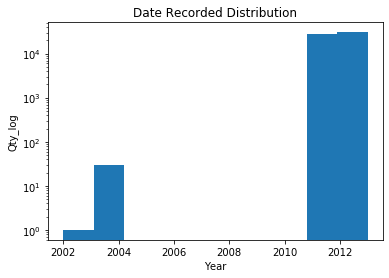

In [23]:
# plot histo gram of recorded years, months

plt.hist(df_return['date_recorded_year'])
plt.title('Date Recorded Distribution')
plt.yscale('log')

plt.xlabel('Year')
plt.ylabel('Qty_log')

plt.show()

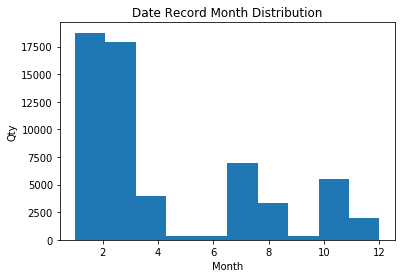

In [24]:
plt.hist(df_return['date_recorded_month'])

plt.title('Date Record Month Distribution')
plt.xlabel('Month')
plt.ylabel('Qty')
plt.show()

In [25]:
non_zero_cons_data = df_return[df_return['construction_year']!= 0]
non_zero_cons_data


,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2011,3
8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action,2013,3
34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,no action,2013,2
67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,action,2013,1
9944,20.0,2011-03-13,0,39.172796,-4.765587,Tajiri,0,Pangani,Tanga,4,...,enough,other,other,unknown,communal standpipe multiple,communal standpipe,functional,no action,2011,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44885,0.0,2013-08-03,540,38.044070,-4.272218,Kwa,0,Pangani,Kilimanjaro,3,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,non functional,action,2013,8
11164,500.0,2011-03-09,351,37.634053,-6.124830,Chimeredya,0,Wami / Ruvu,Morogoro,5,...,enough,machine dbh,borehole,groundwater,communal standpipe,communal standpipe,non functional,action,2011,3
60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,3,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2013,5


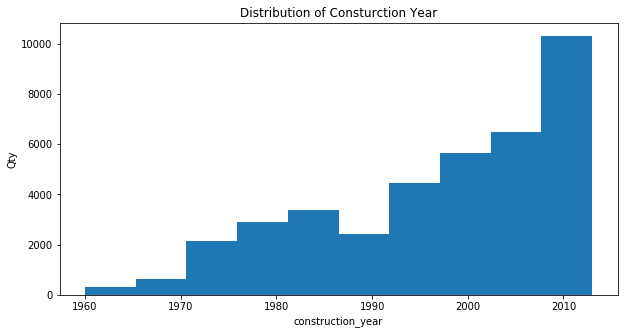

In [26]:
non_zero_cons_data = df_return[df_return['construction_year']!= 0]

plt.figure(figsize=(10,5))

plt.title('Distribution of Consturction Year')

plt.hist(non_zero_cons_data['construction_year'])

plt.xlabel('construction_year')
plt.ylabel('Qty')

plt.show()

In [27]:
df_return.columns

Index(['amount_tsh', 'date_recorded', 'gps_height', 'longitude', 'latitude',
       'wpt_name', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'recorded_by',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'status_group',
       'status_group_action', 'date_recorded_year', 'date_recorded_month'],
      dtype='object')

# Quantitative - TSH

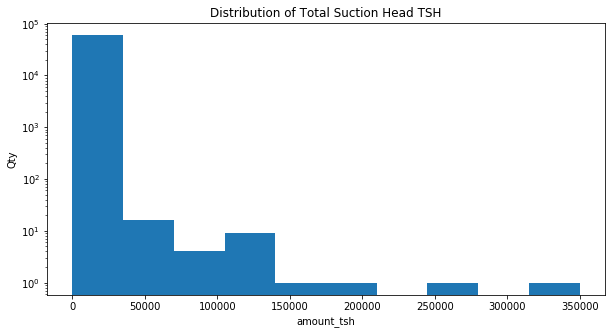

In [28]:
non_zero_cons_data = df_return[df_return['construction_year']!= 0]

plt.figure(figsize=(10,5))

plt.title('Distribution of Total Suction Head TSH')

plt.hist(df_return['amount_tsh'])

plt.xlabel('amount_tsh')

plt.ylabel('Qty')

plt.yscale('log')

plt.show()

In [29]:
def boxplot_quant_col(df, quant_col, by_col):
    
    assert quant_col in df.columns
    assert by_col in df.columns
    
    df.boxplot(
    #column=['amount_tsh', 'quality_group', 'quantity_group'], 
    column=[quant_col], 
    by=by_col, 
    figsize=(5,5),
    grid=False,
    layout=(1,1)
)

In [30]:
boxplot_quant_cols = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year',
    'date_recorded_year'   
]

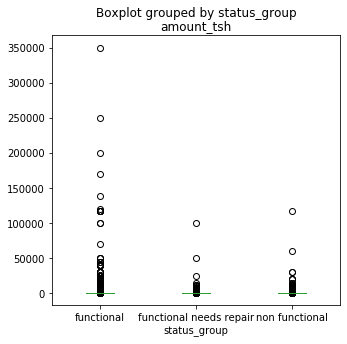

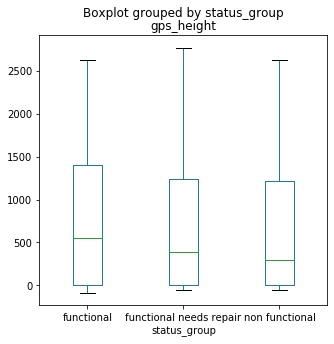

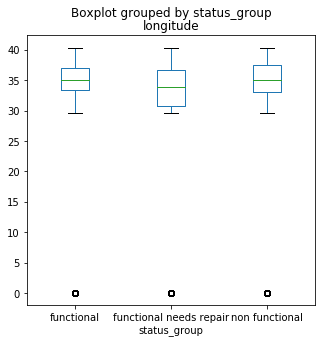

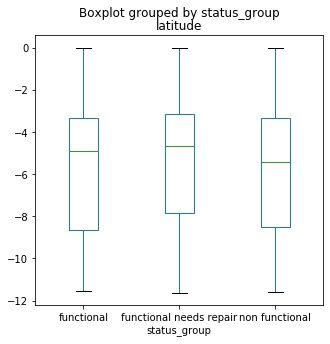

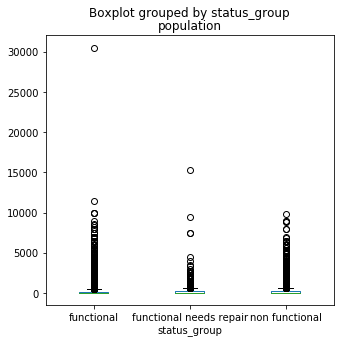

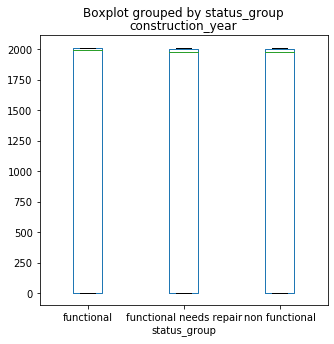

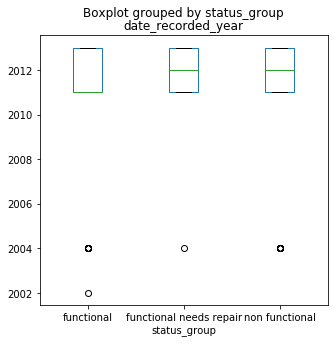

In [31]:
for col in boxplot_quant_cols:
    boxplot_quant_col(df_return, col, 'status_group')

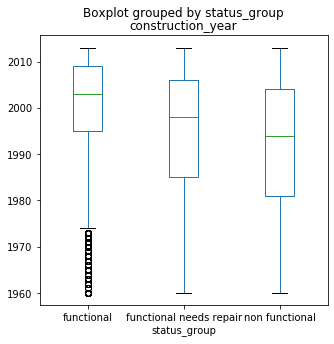

In [32]:
# redo-ing the consturction box plot but this time with removing the bad records (consturction year = 0)
boxplot_quant_col(non_zero_cons_data, 'construction_year', 'status_group')

In [33]:
non_zero_cons_data['status_group_cat'] = non_zero_cons_data['status_group'].astype('category')
non_zero_cons_data['status_group_cat_code'] = non_zero_cons_data['status_group_cat'].cat.codes
non_zero_cons_data

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month,status_group_cat,status_group_cat_code
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,...,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2011,3,functional,0
8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action,2013,3,functional,0
34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,...,dam,surface,communal standpipe multiple,communal standpipe,functional,no action,2013,2,functional,0
67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,action,2013,1,non functional,2
9944,20.0,2011-03-13,0,39.172796,-4.765587,Tajiri,0,Pangani,Tanga,4,...,other,unknown,communal standpipe multiple,communal standpipe,functional,no action,2011,3,functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44885,0.0,2013-08-03,540,38.044070,-4.272218,Kwa,0,Pangani,Kilimanjaro,3,...,river/lake,surface,communal standpipe,communal standpipe,non functional,action,2013,8,non functional,2
11164,500.0,2011-03-09,351,37.634053,-6.124830,Chimeredya,0,Wami / Ruvu,Morogoro,5,...,borehole,groundwater,communal standpipe,communal standpipe,non functional,action,2011,3,non functional,2
60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,3,...,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2013,5,functional,0


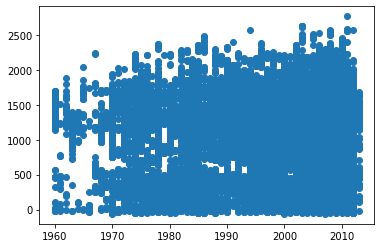

In [34]:
plt.scatter(x=non_zero_cons_data['construction_year'], y=non_zero_cons_data['gps_height'])
plt.show()

In [35]:
from scipy.stats import pearsonr
corr, _ = pearsonr(non_zero_cons_data['construction_year'], non_zero_cons_data['gps_height'])
corr


-0.006243589046018058

# ECDF Plots

### Construction Year

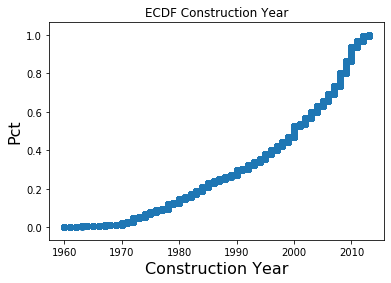

In [36]:
cdf_x = np.sort(non_zero_cons_data['construction_year'])
cdf_n = cdf_x.size
cdf_y = np.arange(1, cdf_n+1) / cdf_n
plt.scatter(x=cdf_x, y=cdf_y);
plt.title('ECDF Construction Year')
plt.xlabel('Construction Year', fontsize=16)
plt.ylabel('Pct', fontsize=16)
plt.show()

### Date Recorded

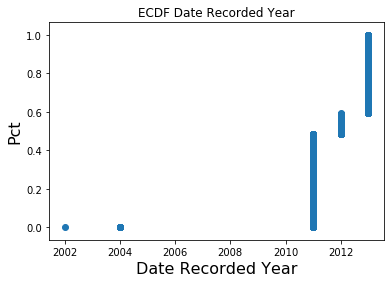

In [41]:
cdf_x = np.sort(df_return['date_recorded_year'])
cdf_n = cdf_x.size
cdf_y = np.arange(1, cdf_n+1) / cdf_n
plt.scatter(x=cdf_x, y=cdf_y);
plt.title('ECDF Date Recorded Year')
plt.xlabel('Date Recorded Year', fontsize=16)
plt.ylabel('Pct', fontsize=16)
plt.show()

# correlation matrix (quantative cols)

In [42]:
quant_cols = [
    'amount_tsh',
    'gps_height',
    'longitude',
    'latitude',
    'population',
    'construction_year',
    'date_recorded_year'   
]

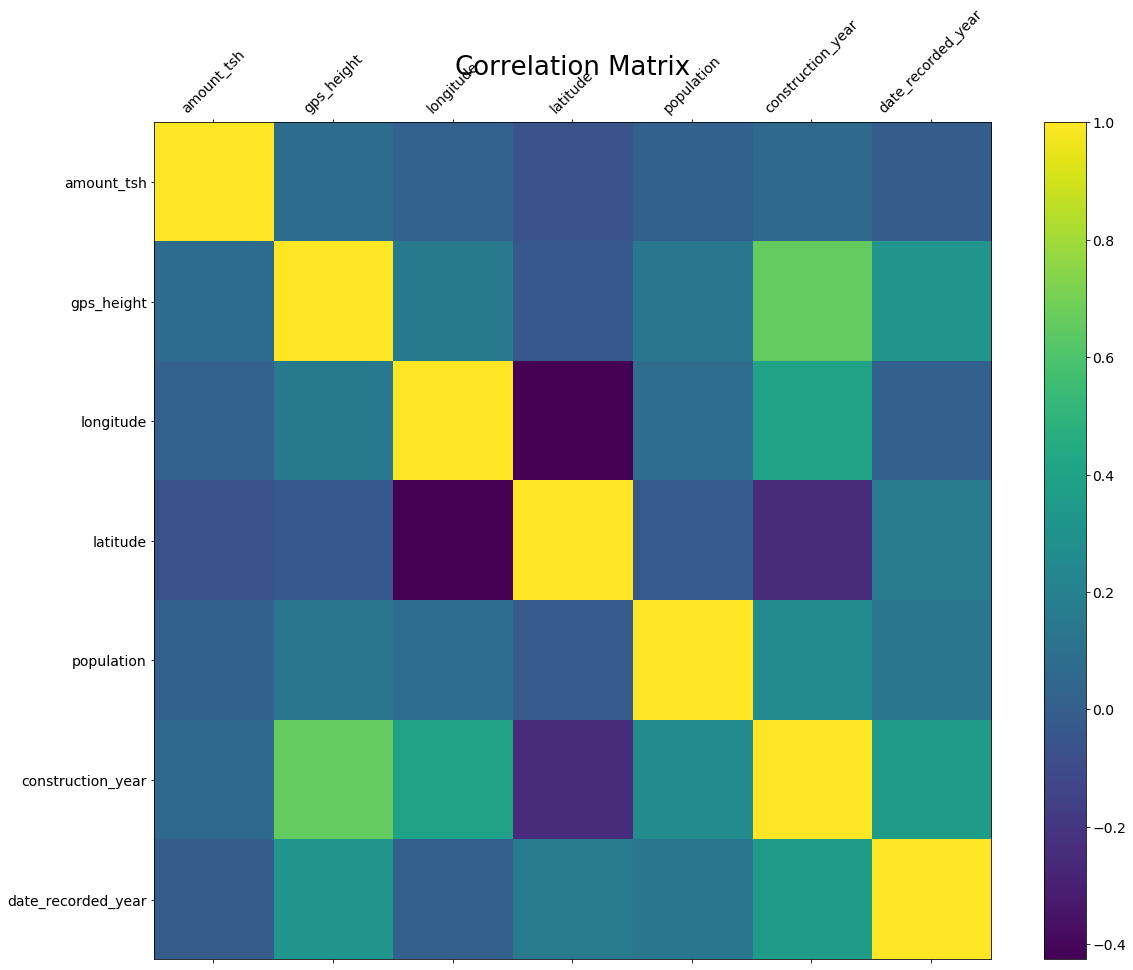

In [43]:
df_corr = df_return[quant_cols]

f = plt.figure(figsize=(19, 15))
plt.matshow(df_corr.corr(), fignum=f.number)
plt.xticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14, rotation=45)
plt.yticks(range(df_corr.shape[1]), df_corr.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=26);

plt.show()

# =================
# Qualitative Properties
# =================

In [44]:
qual_cols = [
    'water_quality', 'quality_group', 
    'quantity', 'quantity_group', 
    'source', 'source_type', 'source_class',
    'waterpoint_type', 'waterpoint_type_group',
    'extraction_type', 'extraction_type_group', 'extraction_type_class',
    'management', 'management_group',
    'basin'            
]

In [45]:
qual_cols_na = [
    'funder',
    'installer',
    'subvillage',
    'public_meeting',
    'scheme_management',
    'scheme_name',
    'permit'
]

## summary dataframe for qualitative cols

In [46]:
qual_summ_df = pd.DataFrame(columns = ['column_name', 'values', 
                                       'qty_unique', 'qty_nunique', 
                                       'qty_na', 'pct_na'])
temp = pd.DataFrame()

df_qual = df[qual_cols + qual_cols_na]

for col in df_qual.columns:
    temp['column_name'] = [col]
    temp['values'] = [df_qual[col].unique()]
    temp['qty_unique'] = len(list(df_qual[col].unique()))
    temp['qty_nunique'] = int(df_qual[col].nunique())
    temp['qty_na'] = df_qual[col].isnull().sum()
    temp['pct_na'] = (df_qual[col].isnull().sum()/ len(df_qual)).round(3)*100
    
    qual_summ_df = qual_summ_df.append(temp)

# enabling column widths to be as long as they need to be
pd.set_option('display.max_colwidth', 0)

qual_summ_df.sort_values('column_name')

,column_name,values,qty_unique,qty_nunique,qty_na,pct_na
0,basin,"[Lake Nyasa, Lake Victoria, Pangani, Ruvuma / Southern Coast, Internal, Lake Tanganyika, Wami / Ruvu, Rufiji, Lake Rukwa]",9,9,0,0.0
0,extraction_type,"[gravity, submersible, swn 80, nira/tanira, india mark ii, other, ksb, mono, windmill, afridev, other - rope pump, india mark iii, other - swn 81, other - play pump, cemo, climax, walimi, other - mkulima/shinyanga]",18,18,0,0.0
0,extraction_type_class,"[gravity, submersible, handpump, other, motorpump, wind-powered, rope pump]",7,7,0,0.0
0,extraction_type_group,"[gravity, submersible, swn 80, nira/tanira, india mark ii, other, mono, wind-powered, afridev, rope pump, india mark iii, other handpump, other motorpump]",13,13,0,0.0
0,funder,"[Roman, Grumeti, Lottery Club, Unicef, Action In A, Mkinga Distric Coun, Dwsp, Rwssp, Wateraid, Isingiro Ho, Private, Danida, World Vision, Lawatefuka Water Supply, Biore, Rudep, Hesawa, Twe, Isf, African Development Bank, Government Of Tanzania, Sobodo, Water, Private Individual, Undp, nan, Not Known, Kirde, Cefa, Ces(gmbh), European Union, Lga, District Council, Muwsa, Dwe/norad, Kkkt_makwale, Sawaka, Ces (gmbh), Olgilai Village Community, Kkkt, Roman Catholic, Norad, Adra, Sema, Piusi, Dwe, Rc Church, Swisland/ Mount Meru Flowers, Ifad, Swedish, Idc, He, Isf/tacare, Jica, Mzee Sh, Aict, Tcrs, Kiuma, Germany Republi, Netherlands, Ruthe, Tulawaka Gold Mine, Nethalan, Tasaf, Concern World Wide, Wfp, Lips, Sida, World Bank, Tanza, 0, Sw, Shipo, Fini Water, Kanisa, Oxfarm, Village Council, Hesawz, Shanta, Fpct, Wvt, Dhv, Ir, Oikos E.Afrika, Anglican Church, Peters, Donor, Secondary Schoo, Amref, Ministry Of Water, Adb, Jbg, Dadis, International Aid Services, Germany, Kibaha Town Council, Dsdp, Dfid, Rural Water Supply And Sanitat, Af, ...]",1898,1897,3635,6.1
0,installer,"[Roman, GRUMETI, World vision, UNICEF, Artisan, DWE, DWSP, Water Aid, Private, DANIDA, Lawatefuka water sup, WEDECO, Danid, TWE, ISF, Kilolo Star, District council, Water, WU, nan, Not known, Central government, CEFA, Commu, Accra, World Vision, LGA, MUWSA, KKKT _ Konde and DWE, Government, Olgilai village community, KKKT, RWE, Adra /Community, SEMA, SHIPO, HESAWA, ACRA, Community, IFAD, Sengerema Water Department, HE, ISF and TACARE, Kokeni, DA, Adra, ALLYS, AICT, KIUMA, CES, District Counci, Ruthe, Adra/Community, Tulawaka Gold Mine, KKT C, Hesawa, Water board, LOCAL CONTRACT, WFP, LIPS, TASAF, World, 0, SW, Shipo, Fini water, Kanisa, OXFARM, VILLAGE COUNCIL Orpha, Villagers, Idara ya maji, FPCT, WVT, Ir, DANID, Angli, secondary school, Amref, JBG, DADIS, International Aid Services, RW, Dmdd, TCRS, RC Church, WATER AID, JICA, Gwasco L, AF, AMREF, wananchi, FW, Central Government, MWE &, Gove, RC CHURCH, TDFT, RWE/DWE, Central govt, World Bank, ...]",2146,2145,3655,6.2
0,management,"[vwc, wug, other, private operator, water board, wua, company, water authority, parastatal, unknown, other - school, trust]",12,12,0,0.0
0,management_group,"[user-group, other, commercial, parastatal, unknown]",5,5,0,0.0
0,permit,"[False, True, nan]",3,2,3056,5.1
0,public_meeting,"[True, nan, False]",3,2,3334,5.6


In [47]:
# resetting the display options
pd.reset_option('^display.', silent=True)

In [48]:
qual_summ_df.sort_values('column_name')

,column_name,values,qty_unique,qty_nunique,qty_na,pct_na
0,basin,"[Lake Nyasa, Lake Victoria, Pangani, Ruvuma / ...",9,9,0,0.0
0,extraction_type,"[gravity, submersible, swn 80, nira/tanira, in...",18,18,0,0.0
0,extraction_type_class,"[gravity, submersible, handpump, other, motorp...",7,7,0,0.0
0,extraction_type_group,"[gravity, submersible, swn 80, nira/tanira, in...",13,13,0,0.0
0,funder,"[Roman, Grumeti, Lottery Club, Unicef, Action ...",1898,1897,3635,6.1
0,installer,"[Roman, GRUMETI, World vision, UNICEF, Artisan...",2146,2145,3655,6.2
0,management,"[vwc, wug, other, private operator, water boar...",12,12,0,0.0
0,management_group,"[user-group, other, commercial, parastatal, un...",5,5,0,0.0
0,permit,"[False, True, nan]",3,2,3056,5.1
0,public_meeting,"[True, nan, False]",3,2,3334,5.6


In [49]:
qual_summ_df[qual_summ_df['qty_na']>0].sort_values('column_name')

,column_name,values,qty_unique,qty_nunique,qty_na,pct_na
0,funder,"[Roman, Grumeti, Lottery Club, Unicef, Action ...",1898,1897,3635,6.1
0,installer,"[Roman, GRUMETI, World vision, UNICEF, Artisan...",2146,2145,3655,6.2
0,permit,"[False, True, nan]",3,2,3056,5.1
0,public_meeting,"[True, nan, False]",3,2,3334,5.6
0,scheme_management,"[VWC, Other, nan, Private operator, WUG, Water...",13,12,3877,6.5
0,scheme_name,"[Roman, nan, Nyumba ya mungu pipe scheme, Zing...",2697,2696,28166,47.4
0,subvillage,"[Mnyusi B, Nyamara, Majengo, Mahakamani, Kyany...",19288,19287,371,0.6


## plots - distributions / histogram

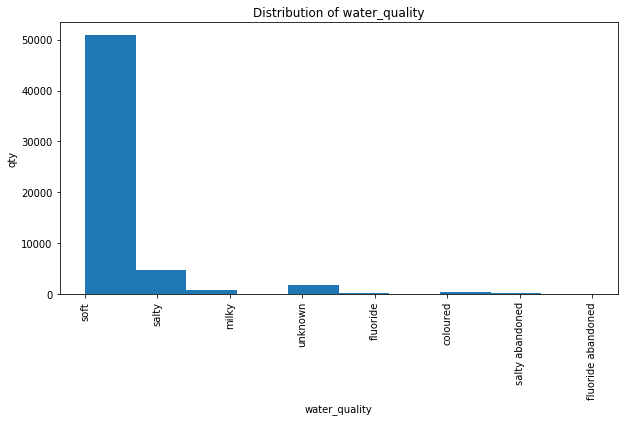

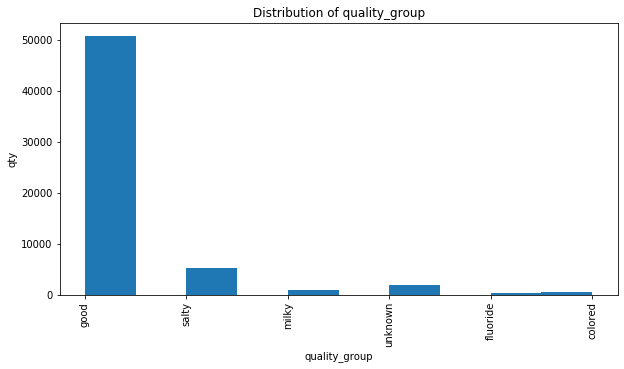

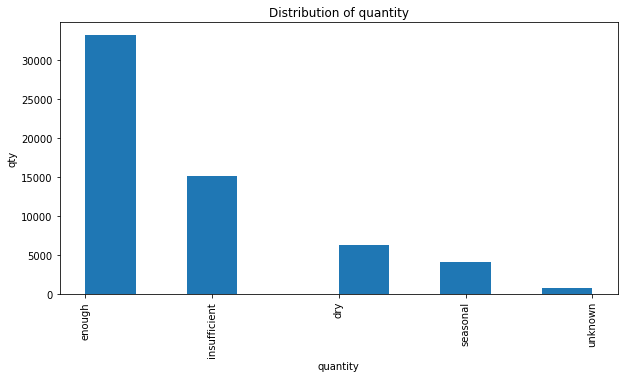

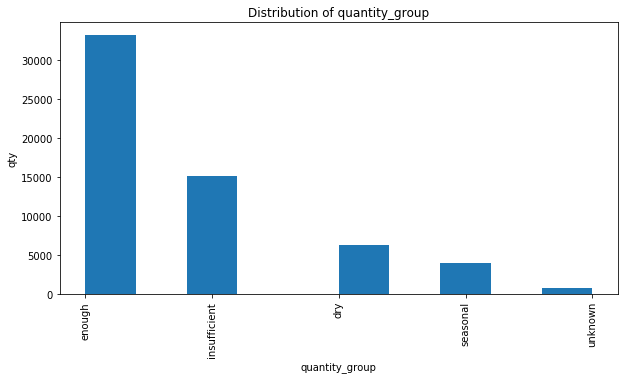

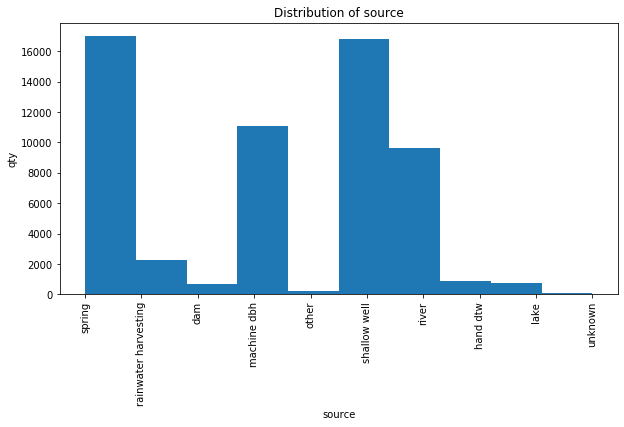

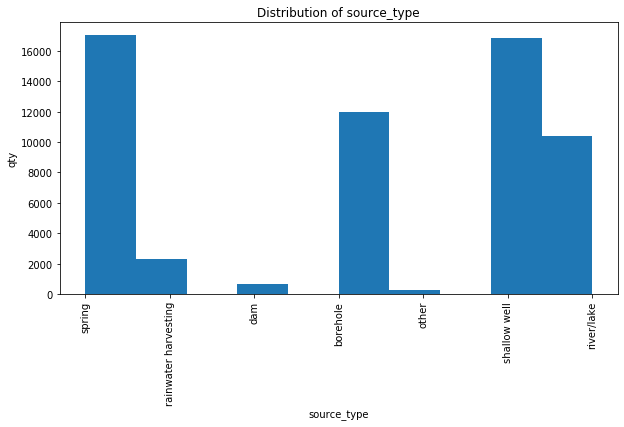

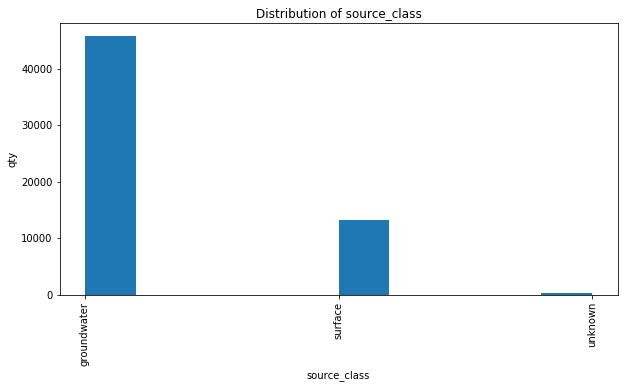

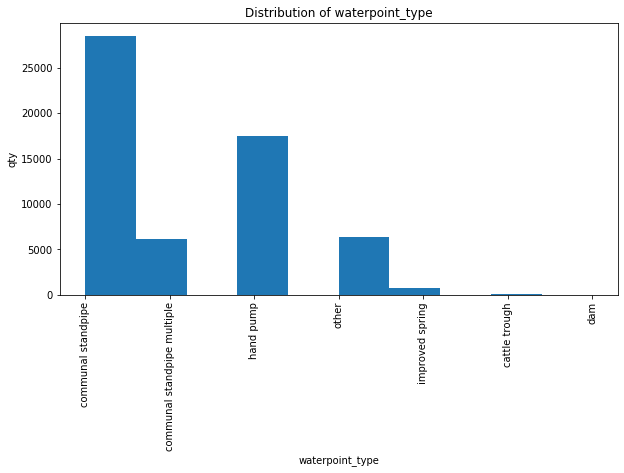

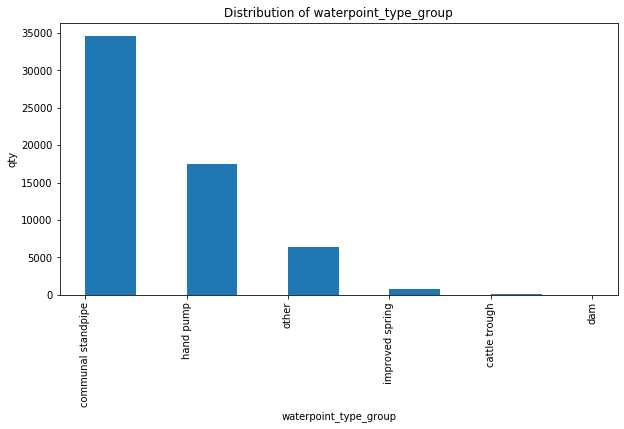

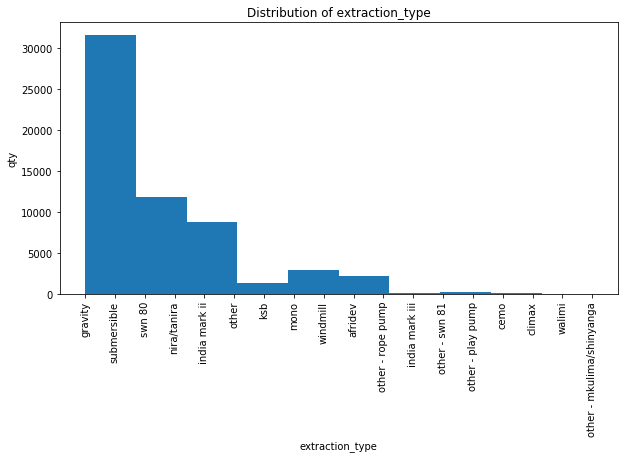

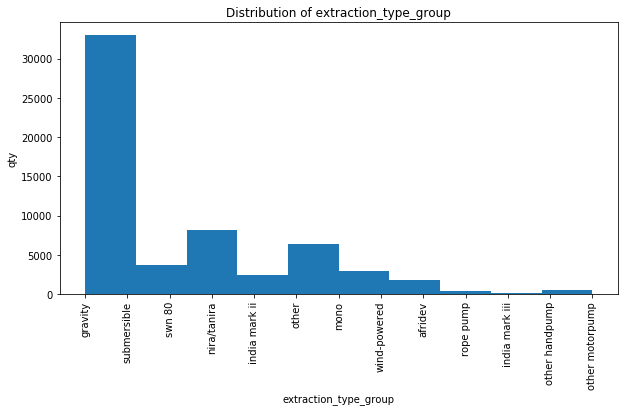

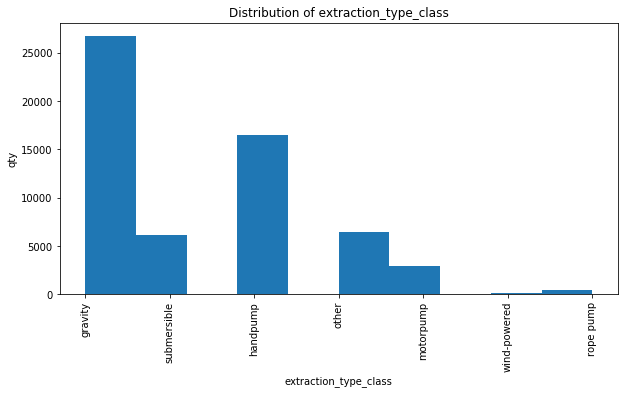

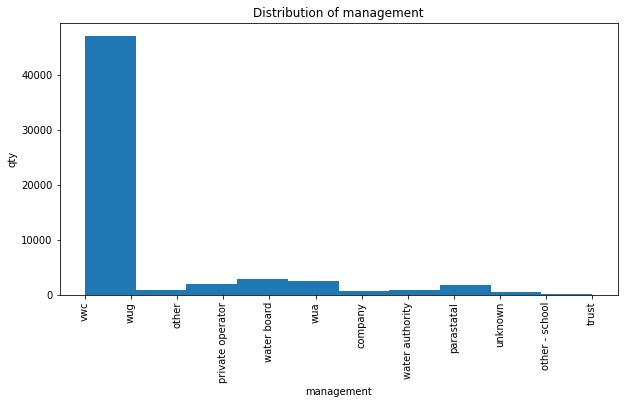

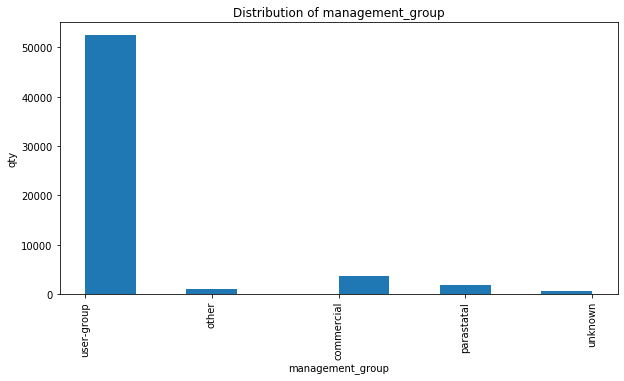

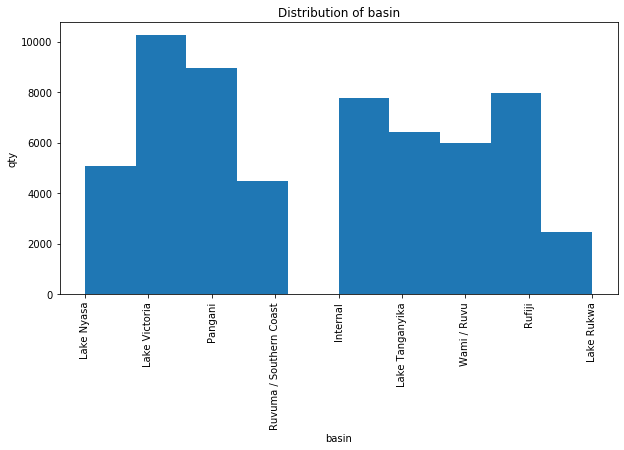

In [50]:
for col in qual_cols:
    assert col in df_return.columns
    
    plt.figure(figsize=(10,5))    
    
    plt.hist(df_return[col])
    
    plt.title('Distribution of ' + col)
    
    plt.xlabel(col)
    
    plt.ylabel('qty')    
    #plt.yscale('log')
    
    plt.xticks(rotation=90)
    
    plt.show()

# plots - distribution w stacked bars

In [51]:
df_return

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2011,3
8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,...,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action,2013,3
34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,...,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional,no action,2013,2
67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,...,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,action,2013,1
19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kagera,18,...,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action,2011,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,3,...,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2013,5
27263,4700.0,2011-05-07,1212,35.249991,-9.070629,Kwa Yahona Kuvala,0,Rufiji,Iringa,11,...,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional,no action,2011,5
37057,0.0,2011-04-11,0,34.017087,-8.750434,Mashine,0,Rufiji,Mbeya,12,...,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional,no action,2011,4


### data prep

In [52]:
df_return['value'] = 1

In [53]:
df_bar = df_return[['quantity_group', 'status_group', 'value']].groupby(['quantity_group', 'status_group']).sum()

In [54]:
df_bar.reset_index(inplace=True)
df_bar

,quantity_group,status_group,value
0,dry,functional,157
1,dry,functional needs repair,37
2,dry,non functional,6052
3,enough,functional,21648
4,enough,functional needs repair,2400
5,enough,non functional,9138
6,insufficient,functional,7916
7,insufficient,functional needs repair,1450
8,insufficient,non functional,5763
9,seasonal,functional,2325


In [55]:
pivot_bar = df_bar.pivot(index='quantity_group', columns='status_group', values='value')
pivot_bar

status_group,functional,functional needs repair,non functional
quantity_group,,,
dry,157,37,6052
enough,21648,2400,9138
insufficient,7916,1450,5763
seasonal,2325,416,1309
unknown,213,14,562


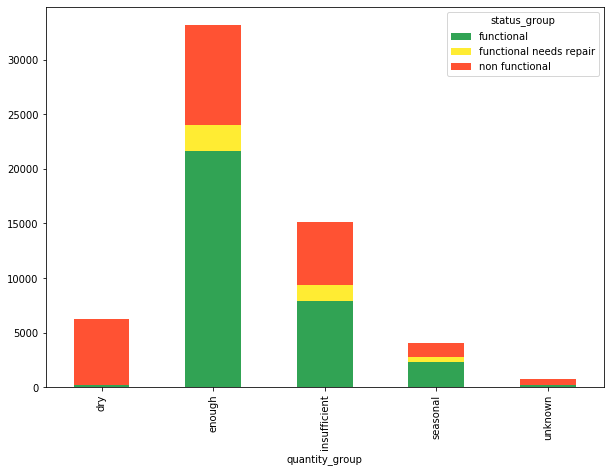

In [56]:
#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
# pivot_df.loc[:,['Jan','Feb', 'Mar']].plot.bar(stacked=True, color=colors, figsize=(10,7))

#Note: .loc[:,['Jan','Feb', 'Mar']] is used here to rearrange the layer ordering
colors = ['#31A354', # green
          '#FFEC33', # yellow
          '#FF5233' # red
         ]

pivot_bar.loc[:,['functional','functional needs repair', 'non functional']].plot.bar(
    stacked=True, color=colors, figsize=(10,7))

plt.show()

## for loop to generate all

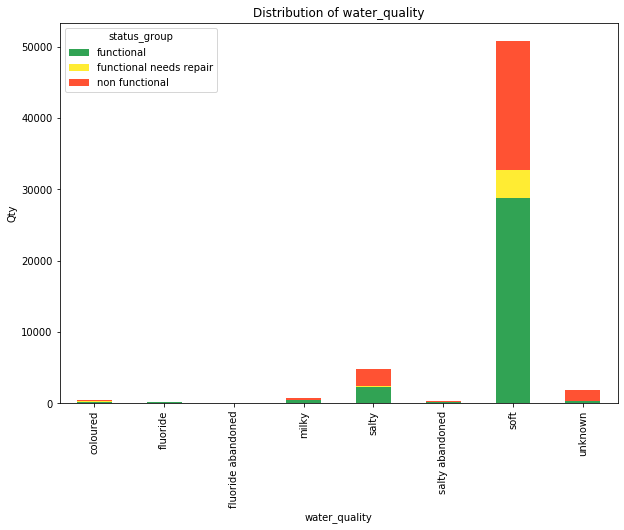

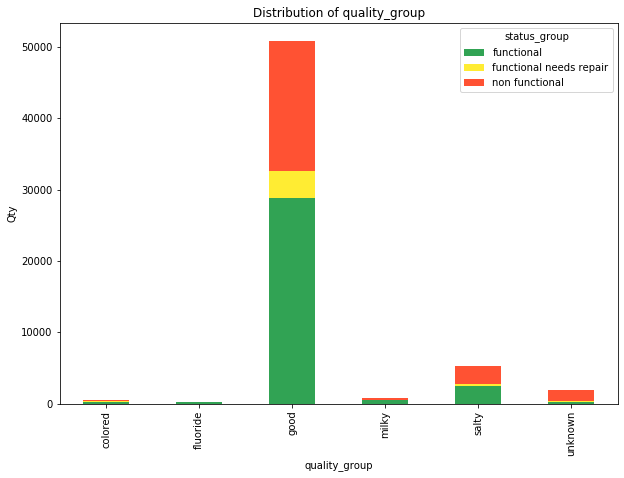

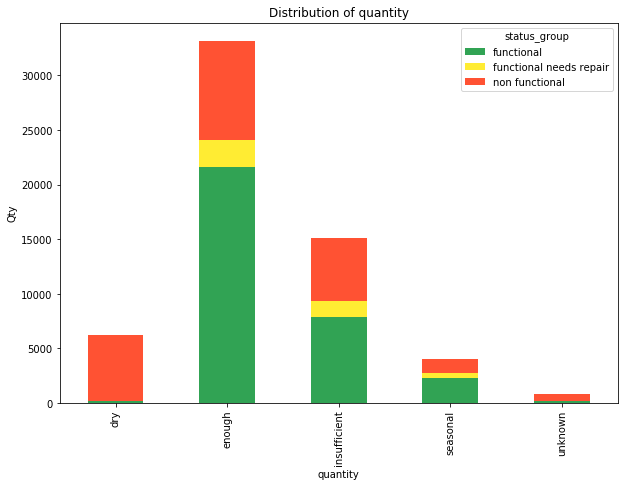

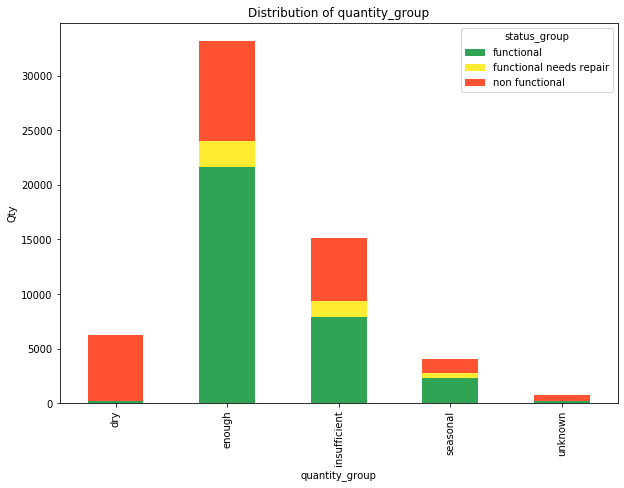

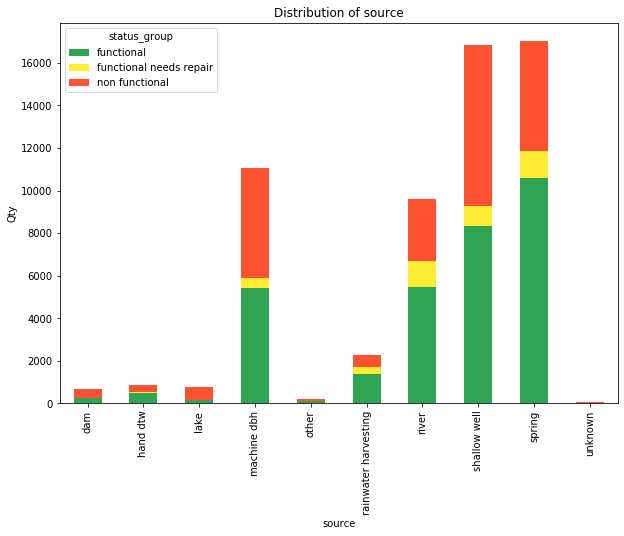

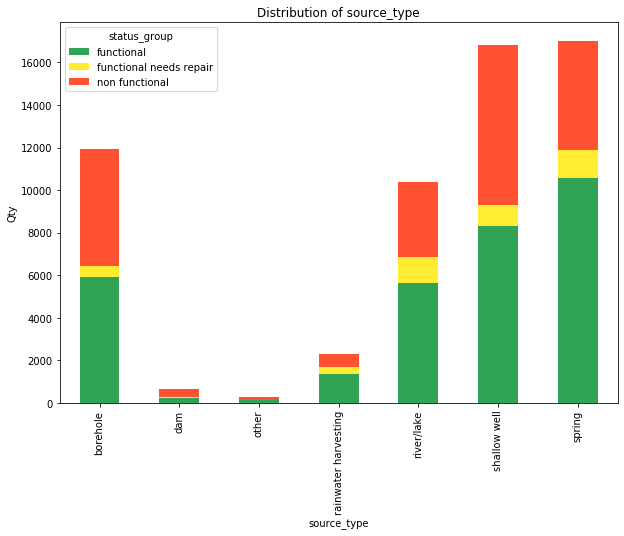

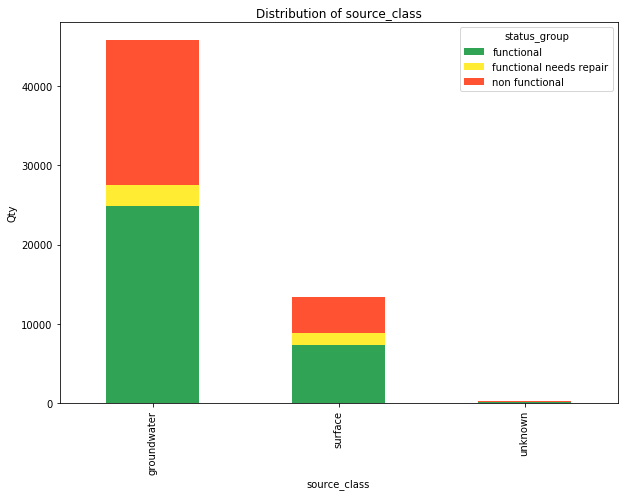

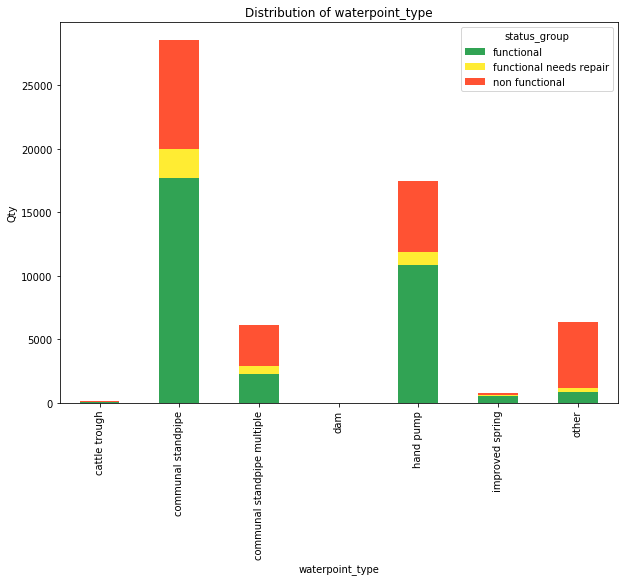

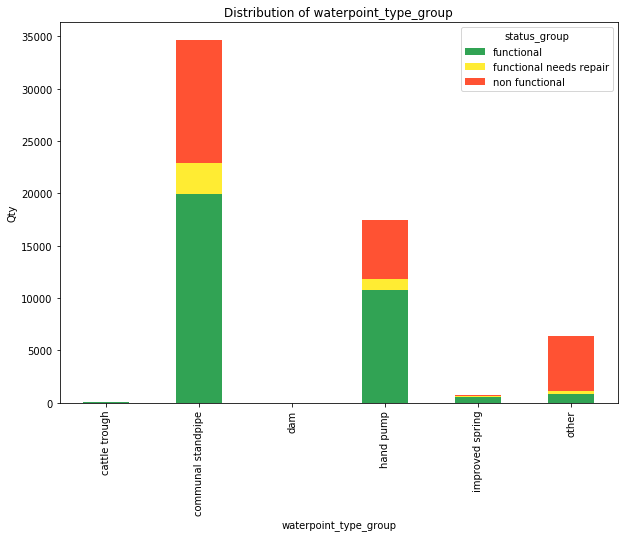

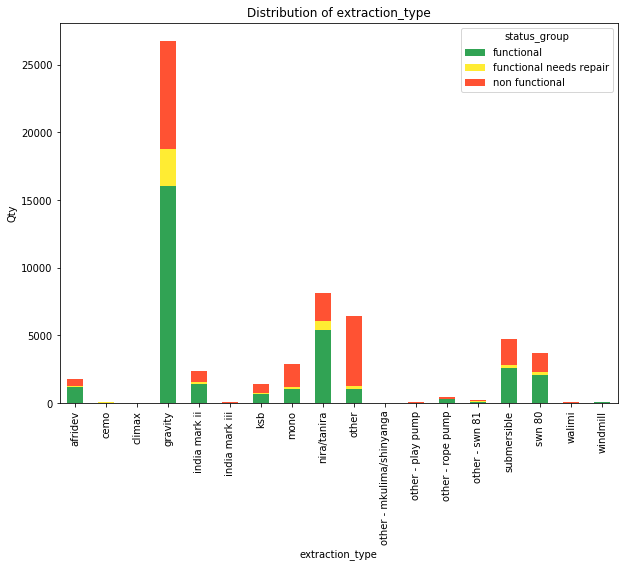

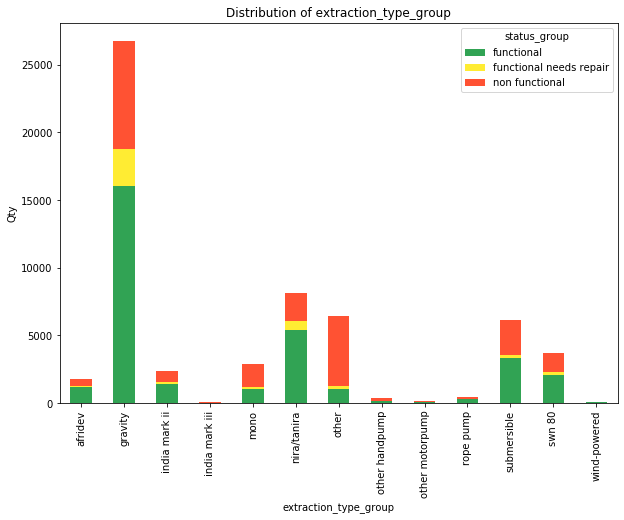

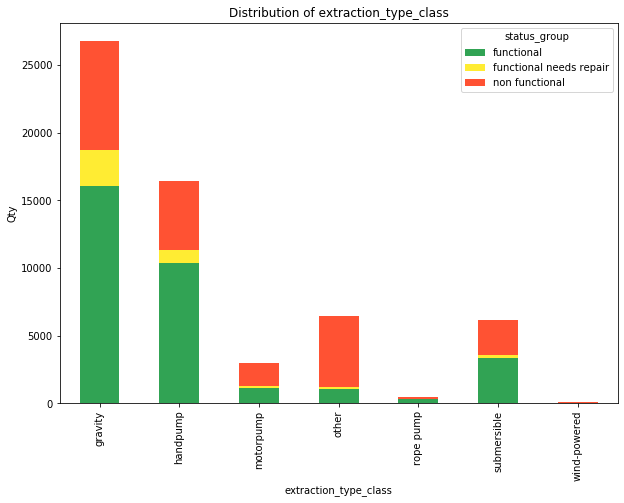

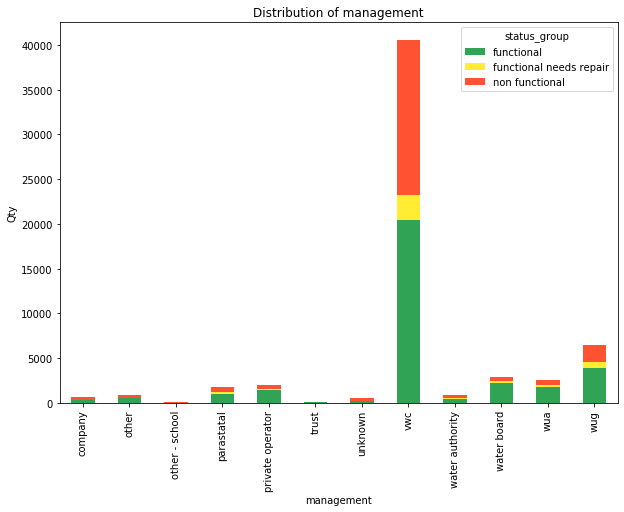

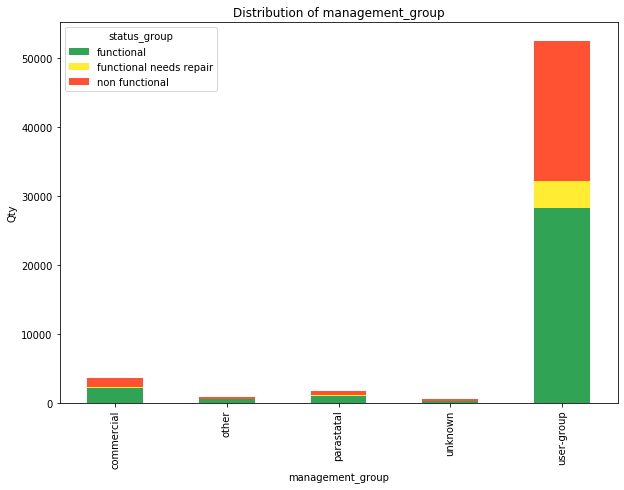

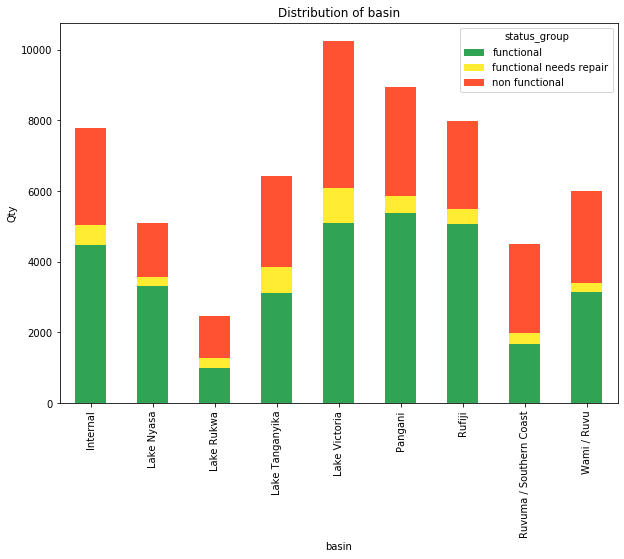

In [57]:

colors = ['#31A354', # green
          '#FFEC33', # yellow
          '#FF5233' # red
]


for c in qual_cols:
    df_bar = df_return[[c, 'status_group', 'value']].groupby([c, 'status_group']).sum()
    df_bar.reset_index(inplace=True)
    pivot_bar = df_bar.pivot(index=c, columns='status_group', values='value')
    pivot_bar.loc[:,['functional','functional needs repair', 'non functional']].plot.bar(stacked=True, color=colors, figsize=(10,7))
    
    plt.ylabel('Qty')
    plt.title('Distribution of ' + c)
    plt.show()

# Statistical Analysis
==============================

In [58]:
np.random.seed(47)
N_rep = 10000

## helper functions

In [59]:
# we need a function called "diff of means"

def diff_of_means(data1, data2):
    """The difference in std dev of two arrays"""
    
    diff = np.mean(data1) - np.mean(data2)
    return diff

In [60]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(a=data, size=len(data), replace=True)
    return func(bs_sample)

In [61]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

In [62]:
def get_num_bins(vals):
    bins = 0
    maxv = max(vals)
    minv = min(vals)
    vals_q75, vals_q25 = np.percentile(vals, [75,25])    
    iqr = vals_q75 - vals_q25
    h = 2 * iqr / len(vals) ** (1/3)
    bins = (maxv - minv) / h
    return int(bins)

In [63]:
# is there a trend with operating status and consturction year?

In [64]:
non_zero_cons_data[['construction_year', 'status_group']].groupby('status_group').mean()

,construction_year
status_group,
functional,1999.938675
functional needs repair,1995.257911
non functional,1992.397538


In [65]:
# instead of 3 groups, we sub divide into 2 groups: whether or not the pump requires repair aka action
non_zero_cons_data[['construction_year', 'status_group_action']].groupby('status_group_action').mean()

,construction_year
status_group_action,
action,1992.823218
no action,1999.938675


In [66]:
# unforunately ~35% of the well did not have any clear construction year information.
# these entries were excluded from the statistical analysis
# however during NaN filling for machine learning, these will likely be backfilled with the avg year (for each status)

len(RAW_df_training_vals[RAW_df_training_vals['construction_year'] == 0]) / len(RAW_df_training_vals)

0.34863636363636363

# pumps: action req'd

In [67]:
df_action = non_zero_cons_data[['construction_year', 'status_group', 'status_group_action']]
df_action = non_zero_cons_data[non_zero_cons_data['status_group_action'] == 'action']
df_action

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month,status_group_cat,status_group_cat_code
id,,,,,,,,,,,,,,,,,,,,,
67743,0.0,2013-01-28,263,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mtwara,90,...,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,action,2013,1,non functional,2
48451,500.0,2011-07-04,1703,34.642439,-9.106185,Kwa John Mtenzi,0,Rufiji,Iringa,11,...,river/lake,surface,communal standpipe,communal standpipe,non functional,action,2011,7,non functional,2
58155,0.0,2011-09-04,1656,34.569266,-9.085515,Kwa Rose Chaula,0,Rufiji,Iringa,11,...,river/lake,surface,communal standpipe,communal standpipe,non functional,action,2011,9,non functional,2
34169,0.0,2011-07-22,1162,32.920154,-1.947868,Ngomee,0,Lake Victoria,Mwanza,19,...,spring,groundwater,other,other,functional needs repair,action,2011,7,functional needs repair,1
58500,0.0,2011-10-04,1510,34.586901,-8.980014,Shuleni,0,Rufiji,Iringa,11,...,river/lake,surface,communal standpipe,communal standpipe,functional needs repair,action,2011,10,functional needs repair,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30647,6000.0,2011-03-14,1439,34.942101,-9.849198,none,0,Lake Nyasa,Iringa,11,...,spring,groundwater,communal standpipe,communal standpipe,non functional,action,2011,3,non functional,2
67885,0.0,2011-03-16,0,38.835001,-4.880204,Mijohoroni,0,Pangani,Tanga,4,...,spring,groundwater,communal standpipe,communal standpipe,non functional,action,2011,3,non functional,2
47002,6.0,2013-08-03,1383,37.454759,-3.323599,Kwa Luka Msaki,0,Pangani,Kilimanjaro,3,...,spring,groundwater,communal standpipe,communal standpipe,non functional,action,2013,8,non functional,2


# pumps: *no* action req'd

In [68]:
df_no_action = non_zero_cons_data[['construction_year', 'status_group', 'status_group_action']]
df_no_action = non_zero_cons_data[non_zero_cons_data['status_group_action'] == 'no action']
df_no_action

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month,status_group_cat,status_group_cat_code
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Iringa,11,...,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2011,3,functional,0
8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Mara,20,...,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action,2013,3,functional,0
34310,25.0,2013-02-25,686,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Manyara,21,...,dam,surface,communal standpipe multiple,communal standpipe,functional,no action,2013,2,functional,0
9944,20.0,2011-03-13,0,39.172796,-4.765587,Tajiri,0,Pangani,Tanga,4,...,other,unknown,communal standpipe multiple,communal standpipe,functional,no action,2011,3,functional,0
49056,0.0,2011-02-20,62,39.209518,-7.034139,Mzee Hokororo,0,Wami / Ruvu,Pwani,60,...,borehole,groundwater,other,other,functional,no action,2011,2,functional,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30410,0.0,2011-08-06,783,30.646486,-7.365418,Sekondari,0,Lake Tanganyika,Rukwa,15,...,borehole,groundwater,hand pump,hand pump,functional,no action,2011,8,functional,0
13677,0.0,2011-08-04,1715,31.370848,-8.258160,Kwa Mzee Atanas,0,Lake Tanganyika,Rukwa,15,...,borehole,groundwater,hand pump,hand pump,functional,no action,2011,8,functional,0
60739,10.0,2013-05-03,1210,37.169807,-3.253847,Area Three Namba 27,0,Pangani,Kilimanjaro,3,...,spring,groundwater,communal standpipe,communal standpipe,functional,no action,2013,5,functional,0


# Steps

# 1) Hypothesis

Is the avg age of construction higher in those pumps which do not require any action? Is it possible that the observed difference is by chance? From the emperical observation, we see that difference is ~7 years when compared to pumps that require action (either functional requires repair, or non-functional)

> H0 - Null Hypothesis

There is *no* difference in the mean construction year between the pumps which require action and those which do not.
In otherwords, the pumps in the 2 groups have the same average construction year.

> HA - Alternative Hypothesis

There *is* a difference in the means construction year between the pumps which require action and those which do not.

# 2) Test Statistic

In [69]:
empirical_diff_mean = diff_of_means(df_no_action.construction_year, df_action.construction_year)
empirical_diff_mean

7.115457143882622

In [70]:
np.mean(df_action.construction_year), np.mean(df_no_action.construction_year)

(1992.8232177547536, 1999.9386748986362)

# 3) 95% CI and p-value

In [71]:
# Here we need to shift the observed data so that both data sets have the same mean.
# we do this because our null hypothesis assumes that there is no difference between them, 
# hence they should have the same mean.

# this way each dataset has the same mean, but still keep their respective std deviations.

In [72]:
mean_construction_year = np.mean(df_action.construction_year)
mean_construction_year

1992.8232177547536

In [73]:
# Generate shifted arrays
action_shifted = df_action.construction_year - np.mean(df_action.construction_year) + mean_construction_year
action_shifted

id
67743    1986.0
48451    1978.0
58155    1978.0
34169    1999.0
58500    1978.0
          ...  
30647    1999.0
67885    1992.0
47002    2008.0
44885    1967.0
11164    2007.0
Name: construction_year, Length: 16987, dtype: float64

In [74]:
no_action_shifted = df_no_action.construction_year - np.mean(df_no_action.construction_year) + mean_construction_year
no_action_shifted

id
69572    1991.884543
8776     2002.884543
34310    2001.884543
9944     2001.884543
49056    2003.884543
            ...     
30410    2001.884543
13677    1983.884543
60739    1991.884543
27263    1988.884543
26348    1994.884543
Name: construction_year, Length: 21704, dtype: float64

In [75]:
bs_replicates_action_mean = draw_bs_reps(data=action_shifted, func=np.mean, size=N_rep)

In [76]:
bs_replicates_no_action_mean = draw_bs_reps(data=no_action_shifted, func=np.mean, size=N_rep)

In [77]:
bs_replicates_mean = bs_replicates_no_action_mean - bs_replicates_action_mean
bs_replicates_mean

array([-0.15892804, -0.03163046,  0.01979836, ..., -0.03200158,
        0.12364648,  0.03880891])

In [78]:
# Compute and print p-value: p

p = np.sum(np.abs(bs_replicates_mean) > empirical_diff_mean) / len(bs_replicates_mean)

print('p-value =', p)

p-value = 0.0


In [79]:
print(np.percentile(a=bs_replicates_mean, q=2.5), np.percentile(a=bs_replicates_mean, q=97.5))

-0.24576070472006106 0.24465012832612837


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


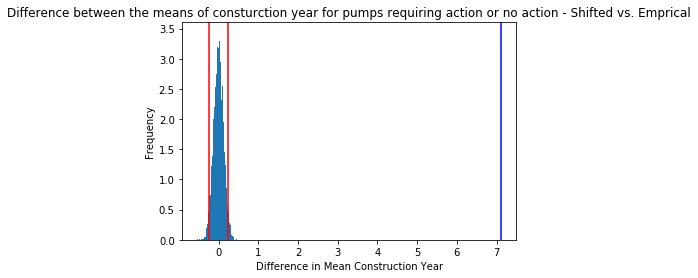

In [80]:
_ = plt.hist(bs_replicates_mean, bins=get_num_bins(bs_replicates_mean), normed=True)

_ = plt.axvline(np.percentile(a=bs_replicates_mean, q=2.5), color='r')
_ = plt.axvline(np.percentile(a=bs_replicates_mean, q=97.5), color='r')

_ = plt.axvline(empirical_diff_mean, color='b')

plt.title('Difference between the means of consturction year for pumps requiring action or no action - Shifted vs. Emprical')
plt.xlabel('Difference in Mean Construction Year')
plt.ylabel('Frequency')

plt.show()

In [81]:
# refactor the above into a function?

# in: df1, df2, reps

# return: p, bs_replicates_mean

def get_bs_replicates_mean(df1, df2, col, N_rep):
    '''
    input is 2 dataframes and number of reps to draw
    df1 can be "action" or "games_before" etc. i.e. it is the base (or can be the "lower" one)
    
    
    returns 2 objects:
    - bs_replicates_mean, df, a dataframe with boostrap replicate means
    - p, float, p value for (0.05 CI)    
    '''
    
    # get the mean
    mean_col = np.mean(df1[col])
    
    # shift the datasets, subtract by the original mean, then add in the new mean
    df1_shifted = df1[col] - np.mean(df1[col]) + mean_col
    df2_shifted = df2[col] - np.mean(df2[col]) + mean_col
        
    bs_replicates_df1 = draw_bs_reps(data=df1_shifted, func=np.mean, size=N_rep)
    bs_replicates_df2 = draw_bs_reps(data=df2_shifted, func=np.mean, size=N_rep)
    
    bs_replicates_mean = bs_replicates_df2 - bs_replicates_df1
    
    
    empirical_diff_mean = diff_of_means(df2[col], df1[col])
    
    p = np.sum(np.abs(bs_replicates_mean) > empirical_diff_mean) / len(bs_replicates_mean)
    
    return p, bs_replicates_mean

In [82]:
p_test, bs_replicates_mean_test = get_bs_replicates_mean(df_action, df_no_action,'construction_year' , N_rep)

In [83]:
p_test, print(np.percentile(a=bs_replicates_mean_test, q=2.5), np.percentile(a=bs_replicates_mean_test, q=97.5))

-0.2464760297087821 0.24610681727383504


(0.0, None)

In [84]:
bs_replicates_mean_test

array([-0.05548565,  0.0090178 ,  0.09051009, ...,  0.02547422,
        0.14709777, -0.09696921])

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


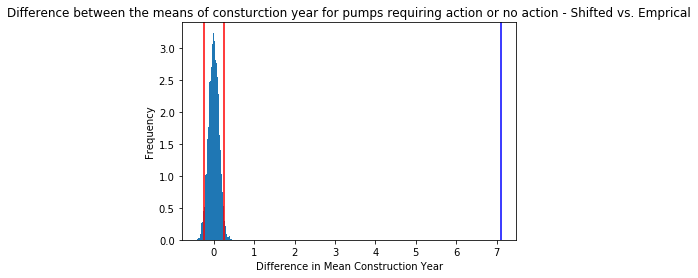

In [85]:
_ = plt.hist(bs_replicates_mean_test, bins=get_num_bins(bs_replicates_mean_test), normed=True)

_ = plt.axvline(np.percentile(a=bs_replicates_mean_test, q=2.5), color='r')
_ = plt.axvline(np.percentile(a=bs_replicates_mean_test, q=97.5), color='r')

_ = plt.axvline(empirical_diff_mean, color='b')

plt.title('Difference between the means of consturction year for pumps requiring action or no action - Shifted vs. Emprical')
plt.xlabel('Difference in Mean Construction Year')
plt.ylabel('Frequency')

plt.show()

# Conclusion

The p-value tells you that there is about a 0.0% chance 

that you would get the difference of means 

observed in the experiment if mean scores were exactly the same. 

**Therefore we reject the null hypothesis and accept the alternative hypothesis.

# Appendix
============

# try to plot the map, if you have time?

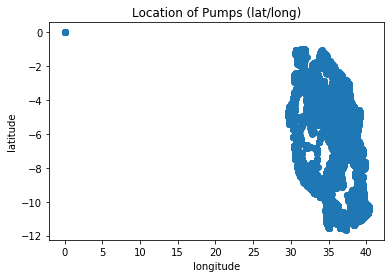

In [86]:
plt.scatter(x=df_return['longitude'], y=df_return['latitude'])
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.title('Location of Pumps (lat/long)')
plt.show()

In [87]:
df_return[df_return['longitude']==0]

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month,value
id,,,,,,,,,,,,,,,,,,,,,
6091,0.0,2013-02-10,0,0.0,-2.000000e-08,Muungano,0,Lake Victoria,Shinyanga,17,...,shallow well,shallow well,groundwater,hand pump,hand pump,functional,no action,2013,2,1
32376,0.0,2011-08-01,0,0.0,-2.000000e-08,Polisi,0,Lake Victoria,Mwanza,19,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional,action,2011,8,1
72678,0.0,2013-01-30,0,0.0,-2.000000e-08,Wvt Tanzania,0,Lake Victoria,Shinyanga,17,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional,no action,2013,1,1
56725,0.0,2013-01-17,0,0.0,-2.000000e-08,Kikundi Cha Wakina Mama,0,Lake Victoria,Shinyanga,17,...,shallow well,shallow well,groundwater,other,other,non functional,action,2013,1,1
13042,0.0,2012-10-29,0,0.0,-2.000000e-08,Kwakisusi,0,Lake Victoria,Mwanza,19,...,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,action,2012,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62177,0.0,2011-07-18,0,0.0,-2.000000e-08,Wazazo,0,Lake Victoria,Shinyanga,17,...,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,action,2011,7,1
3631,0.0,2013-01-22,0,0.0,-2.000000e-08,Mtakuja,0,Lake Victoria,Shinyanga,17,...,shallow well,shallow well,groundwater,hand pump,hand pump,functional,no action,2013,1,1
60843,0.0,2011-07-19,0,0.0,-2.000000e-08,Maendeleo,0,Lake Victoria,Shinyanga,17,...,shallow well,shallow well,groundwater,hand pump,hand pump,functional needs repair,action,2011,7,1


In [88]:
df_return[df_return['latitude']==0]

,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,region,region_code,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group,status_group_action,date_recorded_year,date_recorded_month,value
id,,,,,,,,,,,,,,,,,,,,,
